In [ ]:
import numpy as np
import pandas as pd
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    y_tr_val = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_tr_val = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(y_tr_val), 784) # besides loadng
                                                                                            #the data, I already flatten it into a vector
    y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(y_test), 784)

    return X_tr_val, y_tr_val, X_test, y_test



In [ ]:
#shape
X_tr_val, y_tr_val, X_test, y_test = load_fashion_mnist()
print(X_tr_val.shape, y_tr_val.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


# Scaling

In [ ]:
# normalize to 0-1
X_tr_val = X_tr_val / 255.0
X_test = X_test / 255.0


In [ ]:
# class names

labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

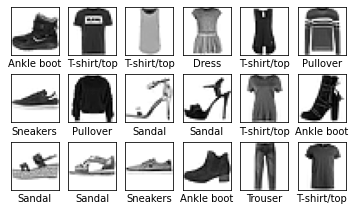

In [ ]:
# visualize classes

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
for i in range(18):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_tr_val[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels_names[y_tr_val[i]])
plt.show()

# Train-Val Split

In [ ]:
from sklearn.model_selection import train_test_split

#split

X_tr, X_val, y_tr, y_val = train_test_split(X_tr_val, y_tr_val, train_size= 0.9, random_state= 123)



# 1. Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

clf1 = Perceptron(fit_intercept = False)
clf2 = Perceptron(fit_intercept = True)

#train phase
clf1.fit(X_tr, y_tr)
clf2.fit(X_tr, y_tr)

#estimation (y_hat)
y_pred_clf1 = clf1.predict(X_val)
y_pred_clf2 = clf2.predict(X_val)



In [ ]:
print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_val, y_pred_clf1)}")
print(f"CLF2 -- with intercept.\tACC: {accuracy_score(y_val, y_pred_clf2)}")

CLF1 -- no intercept.	ACC: 0.8213
CLF2 -- with intercept.	ACC: 0.797


#2. OVO and OVR

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


model = Perceptron(fit_intercept=True)
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X_tr, y_tr)
# make predictions
y_tr_pred_ovo = ovo.predict(X_tr)
y_val_pred_ovo = ovo.predict(X_val)
print(f"OVO \tTR ACC: {accuracy_score(y_tr, y_tr_pred_ovo)}")
print(f"OVO \tVAL ACC: {accuracy_score(y_val, y_val_pred_ovo)}")

ovr = OneVsRestClassifier(model)
ovr.fit(X_tr, y_tr)
y_tr_pred_ovr = ovr.predict(X_tr)
y_val_pred_ovr = ovr.predict(X_val)
print(f"OVR \tTR ACC: {accuracy_score(y_tr, y_tr_pred_ovr)}")
print(f"OVR \tVAL ACC: {accuracy_score(y_val, y_val_pred_ovr)}")

OVO 	TR ACC: 0.8703333333333333
OVO 	VAL ACC: 0.8486666666666667
OVR 	TR ACC: 0.8014259259259259
OVR 	VAL ACC: 0.7866666666666666


#3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
#standard lr

lr =  LogisticRegression(max_iter= 20000)

#fit
lr.fit(X_tr, y_tr)

#prediction
y_train_pred = lr.predict(X_tr)
y_val_pred = lr.predict(X_val)

#accuracy score
tr_accuracy = accuracy_score(y_tr, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'TR. ACC: {tr_accuracy} \n VAL. ACC: {val_accuracy}')

In [ ]:
#roc auc score

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val, y_val_pred))

#4. NN

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop
                   patience = 3, #number of epochs with no improvement
                   verbose=1)


In [ ]:
feature_vector_length = X_tr_val.shape[1]
num_classes = 10

#convert to one-hot encoding representation the ground truth
y_tr_val_cat = to_categorical(y_tr_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

Epoch 18: early stopping
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 670,490
Trainable params: 670,490
Non-trainable params: 0
_________________________________________________________________
None


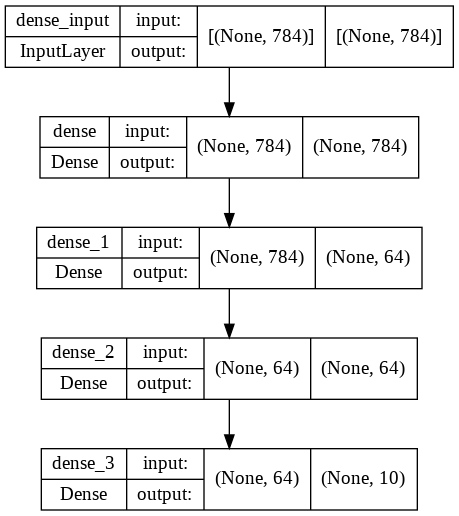

In [ ]:
np.random.seed(123)
set_random_seed(2)

model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax')) #output layer

# Configure the model and start training
model.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric

history1 = model.fit(X_tr_val, y_tr_val_cat, epochs=200, batch_size=16, verbose=0, validation_split=0.1, callbacks=[es])

print(model.summary())
plot_model(model, show_shapes= True)



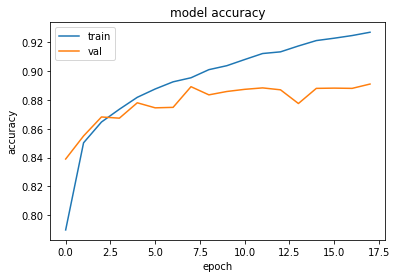

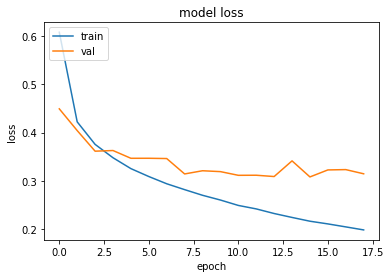

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()


# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_train_pred =model.predict(X_tr).argmax(axis = 1) # take max % among labels
y_val_pred = model.predict(X_val).argmax(axis = 1)

In [ ]:
print(f"NN.\tTrain:{f1_score(y_tr, y_train_pred,average = 'macro'):.4f}\tVal:{f1_score(y_val, y_val_pred,average = 'macro'):.4f}")
print(f"Train acc: {accuracy_score(y_train_pred, y_tr)}\tVal acc: {accuracy_score(y_val_pred, y_val)}")

NN.	Train:0.9292	Val:0.9335
Train acc: 0.9289444444444445	Val acc: 0.9335


#5. K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_tr = []
accuracy_val = []
k_values = range(1, 10)

In [ ]:
%%time
for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_tr, y_tr)
  y_pred_train = model.predict(X_tr)
  y_pred_val = model.predict(X_val)


  accuracy_tr.append(accuracy_score(y_pred_train, y_tr))
  accuracy_val.append(accuracy_score(y_pred_val, y_val))

CPU times: user 46min 52s, sys: 44.4 s, total: 47min 36s
Wall time: 27min 49s


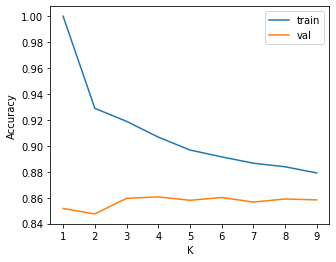

In [ ]:
fig = plt.figure(figsize=(5,4))
plt.plot(k_values, accuracy_tr, label="train")
plt.plot(k_values, accuracy_val, label="val")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
%%time
model = KNeighborsClassifier(n_neighbors= 4)
model.fit(X_tr, y_tr)
y_pred_train = model.predict(X_tr)
y_pred_val = model.predict(X_val)


CPU times: user 5min 46s, sys: 8.03 s, total: 5min 54s
Wall time: 3min 29s


In [ ]:
print(f"Train: {accuracy_score(y_pred_train, y_tr)}")
print(f"Val: {accuracy_score(y_pred_val, y_val)}")

Train: 0.9067592592592593
Val: 0.8606666666666667


#6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:

%%time
#train the decision tree
dt_grid_params = {
    'criterion': ['entropy'],
    'max_depth': (None, 3, 5, 10),
}

dt_clf = DecisionTreeClassifier(random_state= 123)
dt = GridSearchCV(dt_clf, dt_grid_params, n_jobs= -1, cv = 5)
dt.fit(X_tr, y_tr)


CPU times: user 26.7 s, sys: 602 ms, total: 27.3 s
Wall time: 5min 34s


In [ ]:
print("The best parameters are %s with a score of %0.2f"
    % (dt.best_params_, dt.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': 10} with a score of 0.81


In [ ]:
y_train_dt_pred = dt.predict(X_tr)
y_val_dt_pred = dt.predict(X_val)


In [ ]:
print(f"Decision Tree\tTrain:{f1_score(y_tr, y_train_dt_pred,average = 'macro'):.4f}\tVal:{f1_score(y_val, y_val_dt_pred,average = 'macro'):.4f}")
print(f"Train acc: {accuracy_score(y_train_dt_pred, y_tr)}\tVal acc: {accuracy_score(y_val_dt_pred, y_val)}")

Decision Tree	Train:0.8517	Val:0.8158
Train acc: 0.8541481481481481	Val acc: 0.8186666666666667


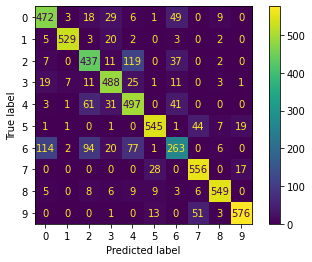

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_val, y_val_dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

# 7. Random Forest

In [ ]:
%%time
#train the random forest
rf_grid_params = {
    'n_estimators': (5, 10, 20),
    'criterion': ['entropy'],
    'max_depth': (None, 3, 5, 10),
}

rf_clf = RandomForestClassifier(random_state= 123)
rf = GridSearchCV(rf_clf, rf_grid_params, n_jobs= -1, cv = 5)
rf.fit(X_tr, y_tr)

CPU times: user 23.3 s, sys: 427 ms, total: 23.7 s
Wall time: 4min 26s


In [ ]:
print("The best parameters are %s with a score of %0.2f"
    % (rf.best_params_, rf.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 20} with a score of 0.87


In [ ]:
y_tr_rf_pred = rf.predict(X_tr)
y_val_rf_pred = rf.predict(X_val)

In [ ]:
print(f"Random Forest.\tTrain:{f1_score(y_tr, y_tr_rf_pred,average = 'macro'):.4f}\tVal:{f1_score(y_val, y_val_rf_pred,average = 'macro'):.4f}")
print(f"Train acc: {accuracy_score(y_tr_rf_pred, y_tr)}\tVal acc: {accuracy_score(y_val_rf_pred, y_val)}")

Random Forest.	Train:0.9992	Val:0.8796
Train acc: 0.9991666666666666	Val acc: 0.8815


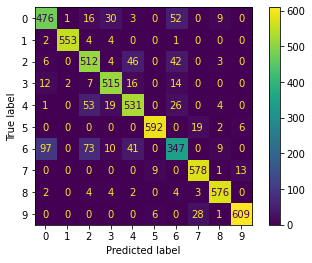

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_val, y_val_rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

#8. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

#train the svc
%time

svc_grid_params = {
    'C': (0.1, 1., 10),
    'kernel': (['rbf']),
}

svc_clf = SVC(random_state= 123)
svc_v1 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)
svc_v1.fit(X_tr, y_tr)


print("The best parameters are %s with a score of %0.2f"
    % (svc_v1.best_params_, svc_v1.best_score_))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
The best parameters are {'C': 10, 'kernel': 'rbf'} with a score of 0.90


In [ ]:
y_train_svc_pred = svc_v1.predict(X_tr)
y_val_svc_pred = svc_v1.predict(X_val)

In [ ]:
print(f"SVC.\tTrain f1:{f1_score(y_tr, y_train_svc_pred,average = 'macro'):.4f}\tVal f1:{f1_score(y_val, y_val_svc_pred, average = 'macro'):.4f}")
print(f"Train acc: {accuracy_score(y_train_svc_pred, y_tr)}\tVal acc: {accuracy_score(y_val_svc_pred, y_val)}")

SVC.	Train f1:0.9721	Val f1:0.9098
Train acc: 0.9721851851851852	Val acc: 0.9103333333333333


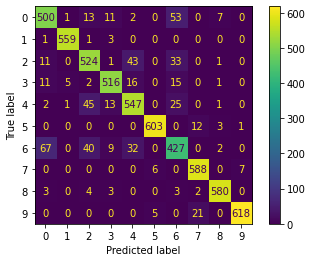

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_val, y_val_svc_pred, labels=svc_v1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_v1.classes_)
disp.plot()
plt.show()

#10. The best model: Classic NN

In [ ]:
# evaluate on test set
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8884
Test results - Loss: 0.3298993706703186 - Accuracy: 0.8884000182151794


In [ ]:
# evaluate on test set
y_test_pred = model.predict(X_test).argmax(axis = 1)

In [ ]:
print(f"Test acc: {accuracy_score(y_test_pred, y_test)}")

Test acc: 0.8884
